In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("./datasets/data.csv")

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# normalize columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [12]:
df['response'].value_counts()

response
No     7826
Yes    1308
Name: count, dtype: int64

In [15]:
df['conversion'] = (df['response'] == 'Yes').astype(int)

In [16]:
df.conversion.value_counts()

conversion
0    7826
1    1308
Name: count, dtype: int64

<Axes: ylabel='customer'>

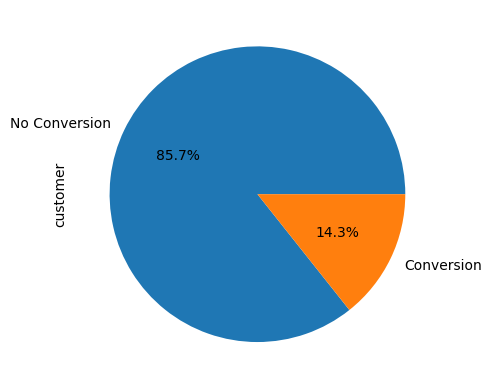

In [25]:
# show conversation rate
df.groupby("conversion")["customer"].count().plot.pie(
    # figsize=(5, 5),
    # y="Customer",
    autopct='%1.1f%%',
    # legend=False,
    labels=["No Conversion", "Conversion"],
    # explode=[0.05, 0.05]
)

<Axes: >

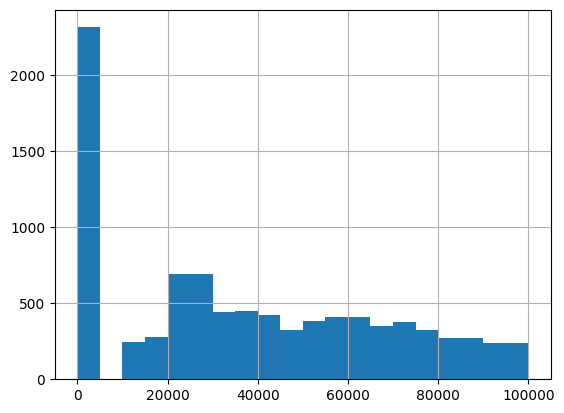

In [26]:
# demographics / conversion
df["income"].hist(bins=20)

In [27]:
# create income category
df["income_category"] = df["income"].apply(
    lambda x: 0 if x == 0 else x//10000
)

In [28]:
df["income_category"].value_counts()

income_category
0    2317
2    1381
3     893
5     791
6     760
4     749
7     697
8     545
1     522
9     479
Name: count, dtype: int64

<Axes: >

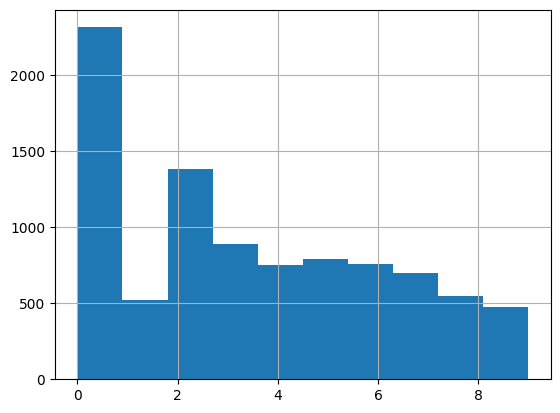

In [32]:
df["income_category"].hist(bins=10)

<class 'pandas.core.series.Series'>
income_category
0     8.545533
1    31.034483
2    20.419986
3    14.109742
4     9.612817
5    15.170670
6    15.000000
7    17.216643
8     9.908257
9    12.526096
Name: conversion, dtype: float64


<Axes: xlabel='income_category'>

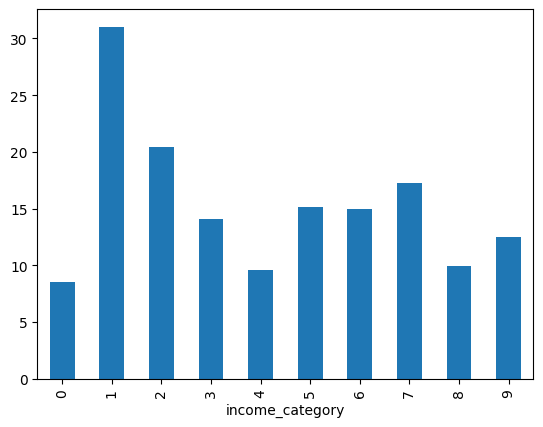

In [39]:
income_conversion = df.groupby("income_category")["conversion"].mean() * 100
print(type(income_conversion))
print(income_conversion)
income_conversion.plot.bar()

Text(0.5, 1.0, 'Conversion Rate across Reported Income')

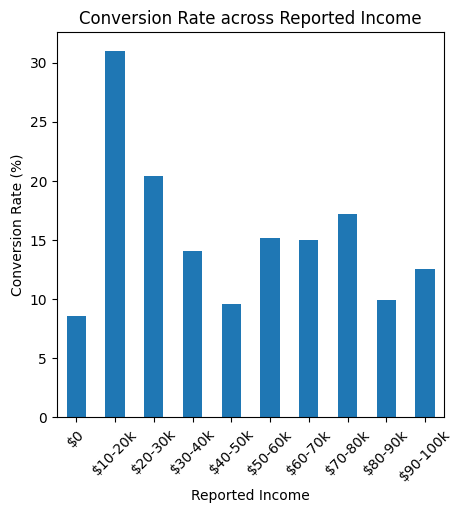

In [40]:
ax = (
    income_conversion
).plot.bar(
    figsize=(5, 5),
    rot=45,
)
ax.set_xticklabels(["$0" if x == 0 else f"${x}0-{x+1}0k" for x in income_conversion.index])
ax.set_ylabel("Conversion Rate (%)")
ax.set_xlabel("Reported Income")
ax.set_title("Conversion Rate across Reported Income")

In [41]:
df['sales_channel'].value_counts()

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

In [46]:
sales_channel_conversion = df.groupby("sales_channel")["conversion"].mean() * 100
print(sales_channel_conversion)

sales_channel
Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
Name: conversion, dtype: float64


Text(0.5, 1.0, 'Conversion Rate per Sales Channel')

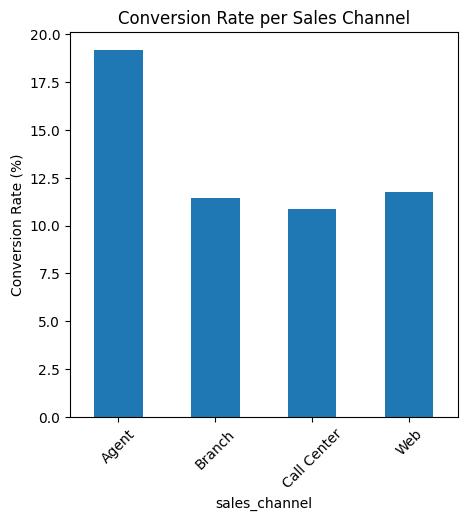

In [47]:
ax = (
    sales_channel_conversion
).plot.bar(
    figsize=(5, 5),
    rot=45
)
ax.set_ylabel("Conversion Rate (%)")
ax.set_title("Conversion Rate per Sales Channel")

In [48]:
sales_channel_count = df.groupby("sales_channel")["conversion"].sum()
print(sales_channel_count)

sales_channel
Agent          666
Branch         294
Call Center    192
Web            156
Name: conversion, dtype: int64


Text(0, 0.5, '')

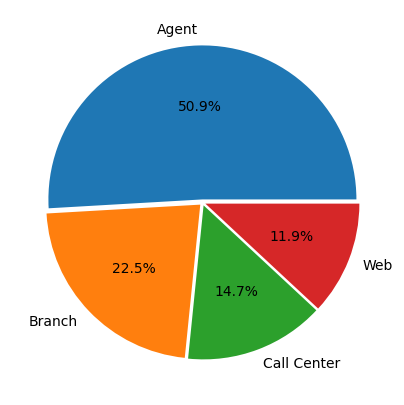

In [51]:
ax = sales_channel_count.plot.pie(
    figsize=(5, 5),
    y="conversion",
    autopct='%1.1f%%',
    legend=False,
    labels=sales_channel_count.index,
    explode=[0.02]*df["sales_channel"].nunique()
)
ax.set_ylabel(None)